220042162

week2 python task2


## Use OpenCV to apply different filters on a sample image

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

**Create a function to show the image**


<span style="font-size:0.7em;">Reference: https://stackoverflow.com/questions/46236180/opencv-imshow-will-cause-jupyter-notebook-crash</span>

In [2]:
def show_img(img, title) -> None:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.title(title)
    plt.show()

**Here is the original image I'm using**

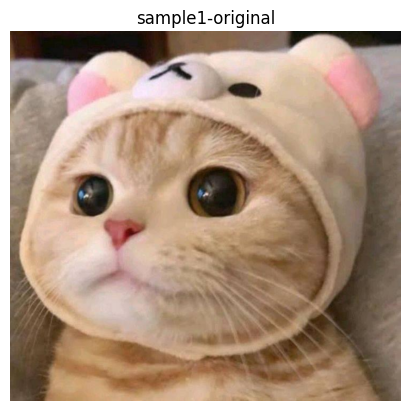

In [3]:
original_img = cv2.imread("./cat.jpg")
show_img(original_img, "sample1-original")

### Gray scale

<span style="font-size:0.7em;">Reference: https://www.geeksforgeeks.org/python-grayscaling-of-images-using-opencv/</span>

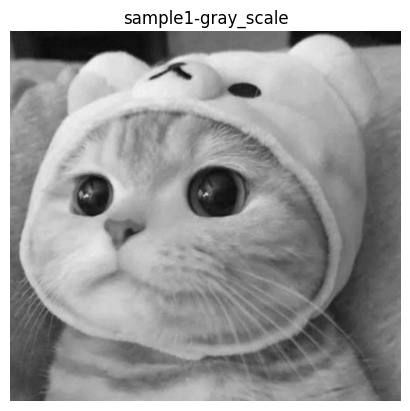

In [4]:
gray_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
show_img(gray_img, "sample1-gray_scale")

### Blur

<span style="font-size:0.7em;">Reference: https://www.geeksforgeeks.org/opencv-python-program-to-blur-an-image/</span>

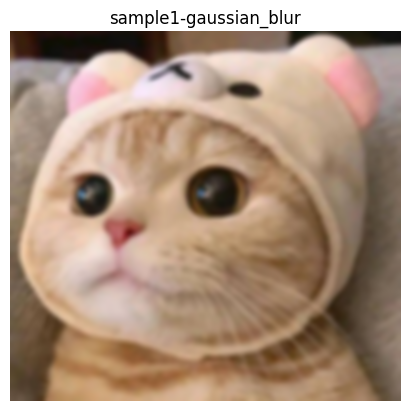

In [5]:
blur_img_gaussian = cv2.GaussianBlur(original_img, (15, 15), 5)
show_img(blur_img_gaussian, "sample1-gaussian_blur")

### Hue Rotation

<span style="font-size:0.7em;">Reference: https://stackoverflow.com/questions/67448555/python-opencv-how-to-change-hue-in-hsv-channels</span>

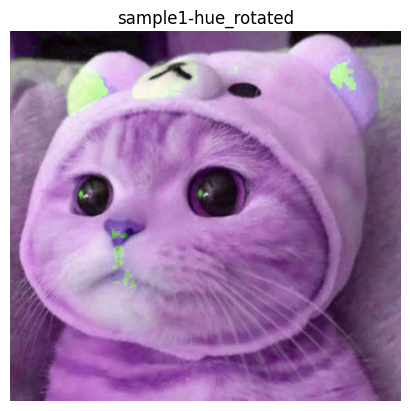

In [6]:
hsv_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2HSV)
h = hsv_img[:,:,0]
s = hsv_img[:,:,1]
v = hsv_img[:,:,2]

amount = 130
h_new = (h + amount) % 180  # clip hue value between 0 - 180
new_hsv_img = cv2.merge([h_new, s, v])
hue_img = cv2.cvtColor(new_hsv_img, cv2.COLOR_HSV2BGR)

show_img(hue_img, "sample1-hue_rotated")

### Inversion

<span style="font-size:0.7em;">Reference: https://www.geeksforgeeks.org/opencv-invert-mask/</span>

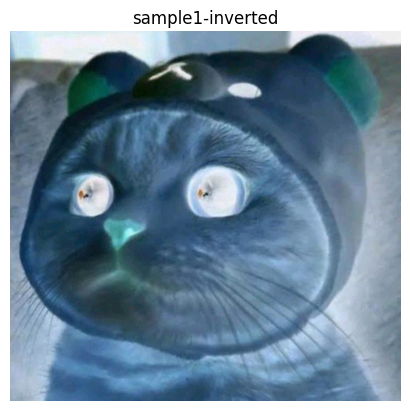

In [7]:
inverted_img = cv2.bitwise_not(original_img)
show_img(inverted_img, "sample1-inverted")

### Erosion

<span style="font-size:0.7em;">Reference: https://www.geeksforgeeks.org/erosion-dilation-images-using-opencv-python/</span>

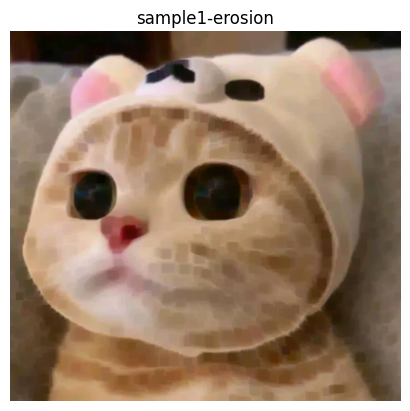

In [8]:
kernel = np.ones((5, 5), np.uint8)
erosion_img = cv2.erode(original_img, kernel, iterations=3)
show_img(erosion_img, "sample1-erosion")

### Dilation

<span style="font-size:0.7em;">Reference: https://www.geeksforgeeks.org/erosion-dilation-images-using-opencv-python/</span>

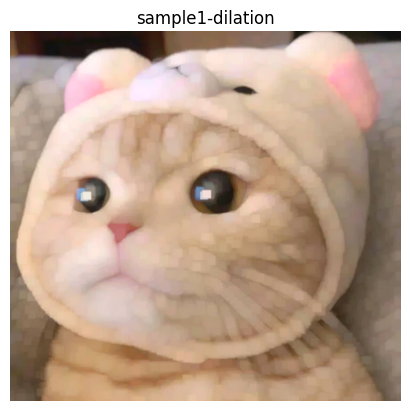

In [9]:
dilated_img = cv2.dilate(original_img, kernel, iterations=3)
show_img(dilated_img, "sample1-dilation")

### Brightness

<span style="font-size:0.7em;">Reference: https://www.tutorialspoint.com/how-to-change-the-contrast-and-brightness-of-an-image-using-opencv-in-python</span>

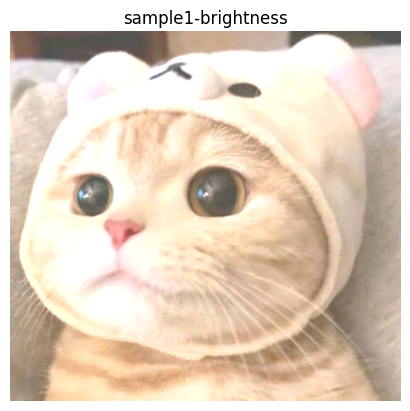

In [10]:
brightness = 70 # brighness control
contrast = 1.0 # contrast control (1.0-3.0,  keeping it at 1.0 to adjust only brightness)

bright_img = cv2.convertScaleAbs(original_img, alpha=contrast, beta=brightness)
show_img(bright_img, "sample1-brightness")

### Contrast

<span style="font-size:0.7em;">Reference: https://www.tutorialspoint.com/how-to-change-the-contrast-and-brightness-of-an-image-using-opencv-in-python</span>

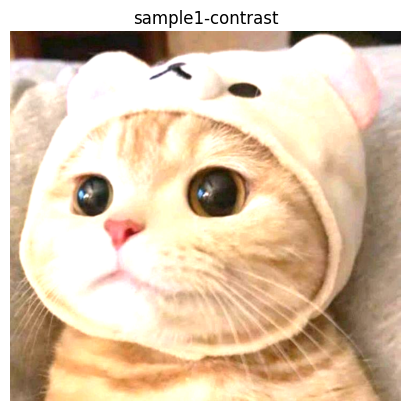

In [11]:
brightness = 0 # brighness control (keep at 0 to adjust contrast only)
contrast = 1.5 # contrast control (1.0-3.0,  keeping it at 1.0 to adjust only brightness)

contrast_img = cv2.convertScaleAbs(original_img, alpha=contrast, beta=brightness)
show_img(contrast_img, "sample1-contrast")

### Noise effect

<span style="font-size:0.7em;">Reference: https://www.askpython.com/python/examples/adding-noise-images-opencv</span>

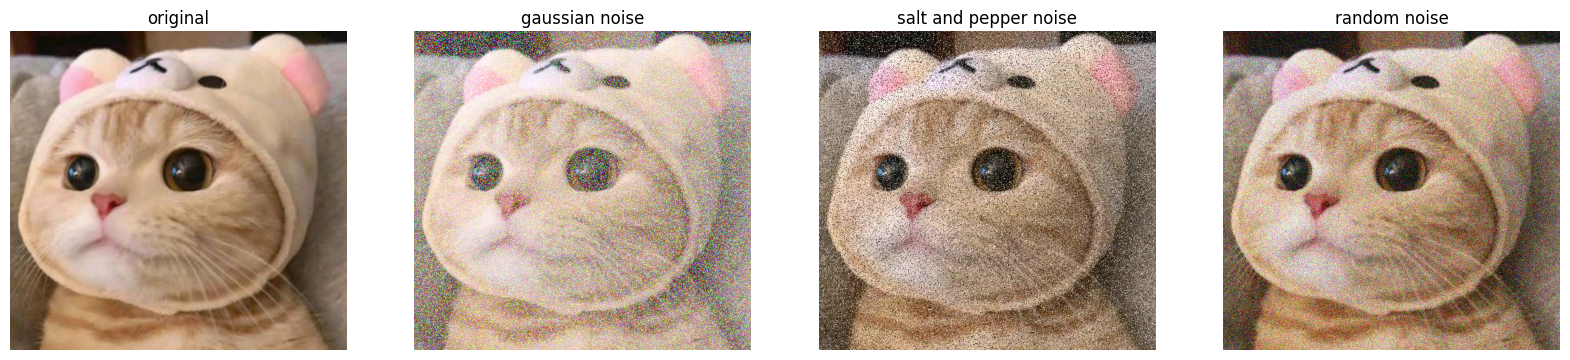

In [12]:
# gaussian noise
mean = 0
std = 2
gaussian_noise = np.random.normal(mean, std, original_img.shape).astype(np.uint8)
gaussian_noise_img = cv2.add(original_img, gaussian_noise)


# salt and pepper noise
sp_noise_img = original_img.copy()
x,y,c = sp_noise_img.shape
noise_amount = 0.2
pixel_noise = int(x * y * noise_amount)

for _ in range(pixel_noise):
        row, col = np.random.randint(0, x), np.random.randint(0, y)
        if np.random.rand() < 0.5:
            sp_noise_img[row, col] = [0, 0, 0]
        else:
            sp_noise_img[row, col] = [255, 255, 255]


# random noise
intensity = 80
random_noise_img = original_img.copy()
random_noise = np.random.randint(-intensity, intensity + 1, random_noise_img.shape)
random_noise_img = np.clip(random_noise_img + random_noise, 0, 255).astype(np.uint8)


# show the images in 1 row 4 col
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

axes[0].imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
axes[0].set_title('original')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(gaussian_noise_img, cv2.COLOR_BGR2RGB))
axes[1].set_title('gaussian noise')
axes[1].axis('off')

# Display the grayscale image
axes[2].imshow(cv2.cvtColor(sp_noise_img, cv2.COLOR_BGR2RGB))
axes[2].set_title('salt and pepper noise')
axes[2].axis('off')

# Display the brightness adjusted image
axes[3].imshow(cv2.cvtColor(random_noise_img, cv2.COLOR_BGR2RGB))
axes[3].set_title('random noise')
axes[3].axis('off')

plt.show()

**And finally, write these images to the file system**

In [13]:
cv2.imwrite("./sample1-grayscale.png", gray_img)
cv2.imwrite("./sample1-gaussian_blur.png", blur_img_gaussian)
cv2.imwrite("./sample1-hue_rotation.png", hue_img)
cv2.imwrite("./sample1-inverted.png", inverted_img)
cv2.imwrite("./sample1-erosion.png", erosion_img)
cv2.imwrite("./sample1-dilation.png", dilated_img)
cv2.imwrite("./sample1-brightness.png", bright_img)
cv2.imwrite("./sample1-contrast.png", contrast_img)
cv2.imwrite("./sample1-gaussian_noise.png", gaussian_noise_img)
cv2.imwrite("./sample1-saltpepper_noise.png", sp_noise_img)
cv2.imwrite("./sample1-random_noise.png", random_noise_img)

True